**Because our datafile is so large we need to use git lfs before cloning the file**

In [1]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 79 not upgraded.
Need to get 6,229 kB of archives.
After this operation, 14.5 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.13.3 [6,229 kB]
Fetched 6,229 kB in 0s (18.2 MB/s)
debconf: unable to init

**clone the repo to access the data files**

In [2]:
!git clone https://github.com/Cbmunns/Traffic_Sign_Recognition.git

Cloning into 'Traffic_Sign_Recognition'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 62 (delta 17), reused 34 (delta 7), pack-reused 0
Unpacking objects: 100% (62/62), done.


**Unzip the large file**


In [3]:
import zipfile

!unzip /content/Traffic_Sign_Recognition/sign_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

**Import important libraries for the file**

In [206]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os, sys
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

**Here we set up the lists to hold the data and their respective labels**

**Set the number of classes or different number of signs we wish to train on**

**Then set the path for or data set**

In [207]:
data = []
labels = []
classes = 43
os.chdir("/content")
cur_path = os.getcwd()
print(cur_path)

/content


**Let's look at the different type of signs we'll be training on**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


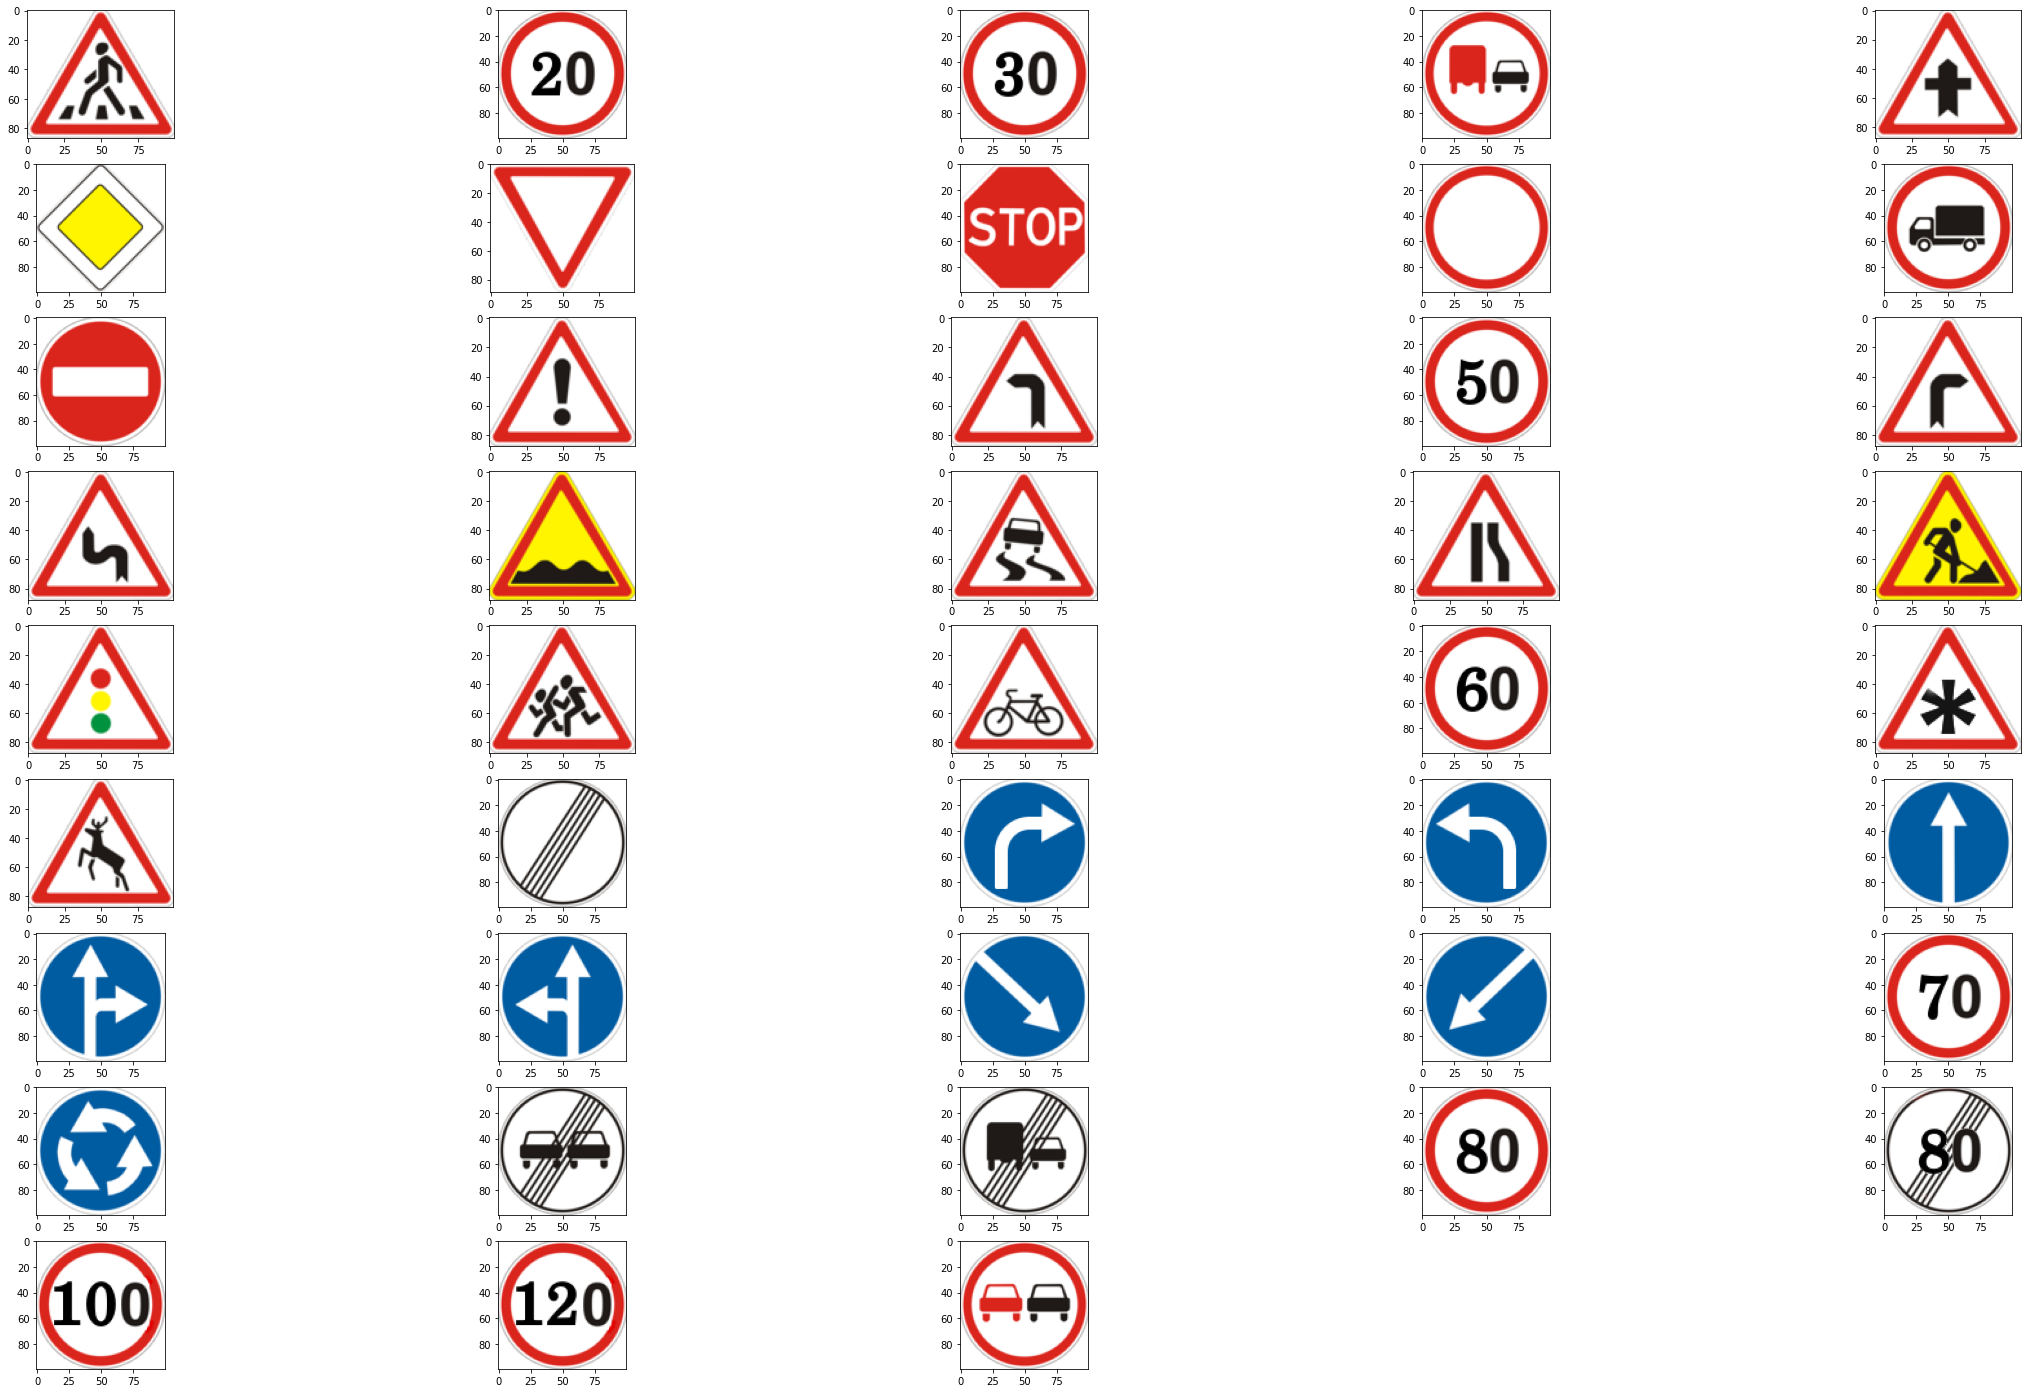

In [208]:
# Pull the data
meta = pd.read_csv('Meta.csv')
imgs = meta["Path"].values
data1=[]


# Grab them out of the file
for img in imgs:
    image = Image.open(img)    
    #image = image.resize((30,30))    
    data1.append(np.array(image))

# Assign them
meta = np.array(data1)

# Config figure
plt.figure(figsize=(40,25))

# Output the image
for i in range (1, classes+1):
  plt.subplot(9,5,i)
  plt.imshow(meta[i-1])

**Create a grayscale function for preprocessing**

In [209]:
# Convert from RGB to Grayscale
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img


**Then iterating through each folder, go over every image**

**Open the image**

**Resize each picture to 30 by 30 for consistency**

**Grayscale the image**

**Add it to the image list**

**And then add it's corresponding label**

In [210]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    print(path)
    images = os.listdir(path)
    #print(images)
    for a in images:
        try:
            image = cv2.imread(path + '/'+ a)
            image = cv2.resize(image,(30,30))
            image = grayscale(image)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


/content/train/0
/content/train/1
/content/train/2
/content/train/3
/content/train/4
/content/train/5
/content/train/6
/content/train/7
/content/train/8
/content/train/9
/content/train/10
/content/train/11
/content/train/12
/content/train/13
/content/train/14
/content/train/15
/content/train/16
/content/train/17
/content/train/18
/content/train/19
/content/train/20
/content/train/21
/content/train/22
/content/train/23
/content/train/24
/content/train/25
/content/train/26
/content/train/27
/content/train/28
/content/train/29
/content/train/30
/content/train/31
/content/train/32
/content/train/33
/content/train/34
/content/train/35
/content/train/36
/content/train/37
/content/train/38
/content/train/39
/content/train/40
/content/train/41
/content/train/42


**Convert the lists into numpy arrays**

In [211]:
data = np.array(data)
labels = np.array(labels)

**Display our now reshaped and grayscaled images**

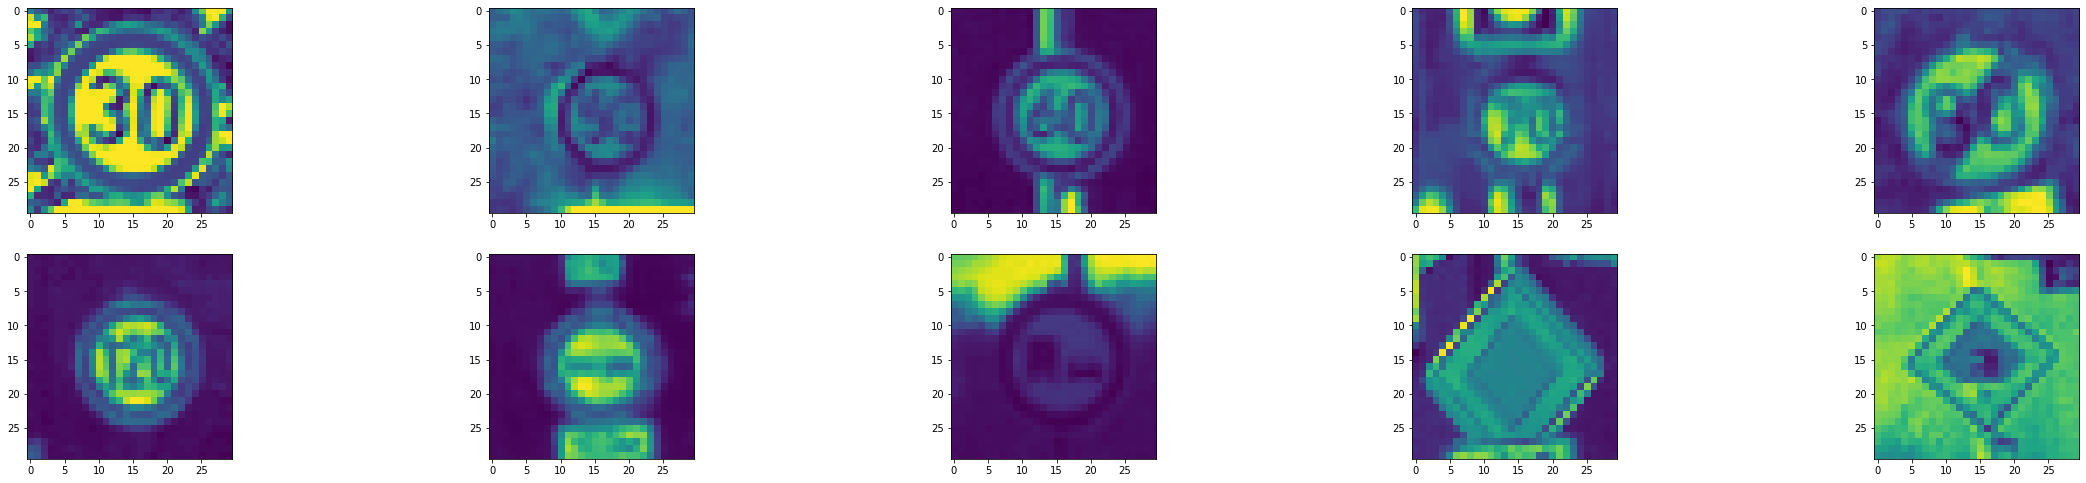

In [212]:
# Config figure
plt.figure(figsize=(40,40))

# Output the image
for i in range (1, 11):
  plt.subplot(9,5,i)
  plt.imshow(data[i*2000])

**We then get the dimensions of the arrays**

**Then seperate into the test/train sets**

In [213]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30) (39209,)


**We do further preprocessing through reshaping and normalization**

In [214]:
# We need to reshape to allow it to be seen by the model
X_train = X_train.reshape(-1,30,30,1)
X_test = X_test.reshape(-1,30,30,1)

# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

**We need to label the sign IDs to help identify which is which**

In [215]:
signs = {   0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits',
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

**Examining the training set we can see that there is a disparity in the number of images each sign has**

<function matplotlib.pyplot.show>

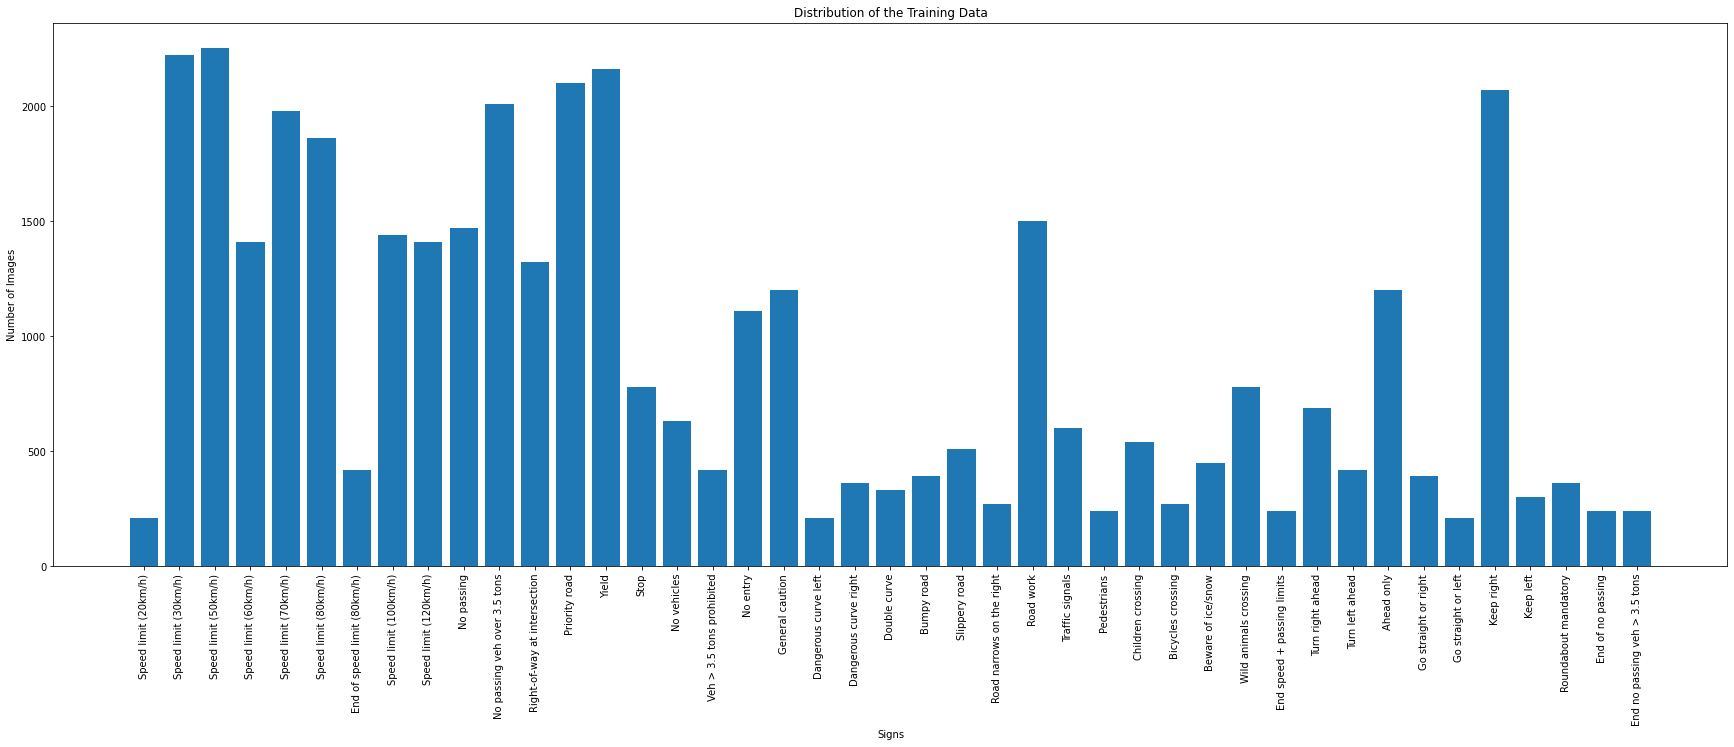

In [216]:
# Set the trackers for IDs and Counts
sign_id = []
sign_count = []

# Parse through folders and get their length and ID
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))    
    images = os.listdir(path)
    sign_count.append(len(images))
    sign_id.append(signs[i])

# Generate bar graph

plt.figure(figsize=(30,10))
plt.bar(sign_id, sign_count)
plt.title('Distribution of the Training Data')
plt.xlabel('Signs')
plt.ylabel('Number of Images')
plt.xticks(sign_id, rotation='vertical')
plt.show

**Place a quick check on the dimensions of the new arrays**

In [217]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 1) (7842, 30, 30, 1) (31367,) (7842,)


**We then use one hot encoding to break the different labels into easily deciphered binary**

For ex.)  
**label**  
stop,  
10,  
20,  

Becomes.)  
**stop  10  20**  
1, 0, 0,  
0, 1, 0,  
0, 0, 1,  




In [218]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

**This code is to identify and verify that a GPU is available and what it's label is**


In [219]:

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUS Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUS Available:  1
Found GPU at: /device:GPU:0


**Now we need to construct our model**

We start with the basis of our model, Convolutional layers where we need to tune several factors 


*   **Conv2D**: We call the layer that can process 2D images 

*   **Filters**: act like neurons in a standard neural network where each filter is a set of random multipliers that is ran against the values of the image pixels to help identify specific features. We choose 32 for these layers to learn from

*   **Kernel Size**: The kernel is essentially the lense that we use to examine the the pixels in the image. in this case we run a 3X3 lense over our pixels
 and then apply the values from out filters to the window and recreate the image. Must use odd values

*   **Activation**: relu or rectified linear unit provides an adjustment to the outout of the filter by applying max(x,0) where the value is either above zero or if negative defaults to zero

*  **Input Shape** : To make sure the network works properly the input shape of the model must match the shape of the data









In [220]:
  #Building the model
  model = Sequential()
  # We establish our convolutional layers with filter size of 5X5
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30,30,1)))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

**To help Identify key features we need to apply Pooling**   
 
A further reduction that in this case, Max Pooling, looks for the largest value within it's lense and outputs a new reduced feature map with only the largest values from the previous image
 
we choose a 2X2 lense

In [221]:
# Max-pooling/down sample the output of this data  of size 2 x 2
model.add(MaxPool2D(pool_size=(2, 2)))

**To help prevent over fitting we use dropout**   

This applies "noise" aka changes random values to 0 at a rate specified. in this case we want to change 25% of the current feature values to 0

In [222]:
# Improve the reliability we use dropout to regularize the output and help prevent overfitting
model.add(Dropout(rate=0.25))

**We do it again! This time setting filters to 64 to examine even more different features**

For pooling, we change it's size as to prevent data loss as the feature map shrinks to ODDXODD shape that a 2X2 lense can't fully see

In [223]:
  # We repeat! now with the filter set to 3 X 3
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  # Down sample
  model.add(MaxPool2D(pool_size=(3, 3)))
  # Regularize
  model.add(Dropout(rate=0.25))

To output the to a readable result that matches the target when need to run the values through a standard layer but our current feature map is a 2D array and the nerons are 1D. Thus we must reshape them to 1D

In [224]:
  # Flatten the data to prepare for the Dense layer
  model.add(Flatten())

**Using a standard Dense layer**



*   **Neurons**: Each node recieves the data and works on it independently but is fully connected. We use a larger one at 512 neurons to recieve the image data

*  **Activation**: We use relu again which uses max(X,0) function



In [225]:
  # Run this through a standard Dense layer
  model.add(Dense(512, activation='relu'))

**Applying 50% drop out to really help prevent over training**



In [226]:
  # Regularize
  model.add(Dropout(rate=0.5))

**Finally we have our final output Dense layer**


*   **Neurons**: the number of nodes for the output layer must match the number of targets we are looking for to give a proper prediction
*   **Activation**: We need to have each output neuron to give a probability of which target is most likely the correct choice. To do this we need to apply exponential normalization AKA Softmax to the data



In [227]:
  # Final output layer with all 43 classes represented
  model.add(Dense(43, activation='softmax'))

**Compile the model**  


*   **Loss**: categorical_crossentropy a probabilistic loss function that calcualates crossentropy (the difference between two probility distrubutions) among two or more labels/targets that are one hot encoded

*   **Optimizer**: This dictates how the algorithm learns, we use adam (adaptive, moment, estimation), a very common and powerful general use one that utilizes stochastic gradient descent. Essentially adjusting weights and acceleration through momentum

*   **Metrics**: We choose accuracy to see the progression of the model guessing correctily 


In [228]:
  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Here we have a breakdown of our model!**

Key things we can pull from this are 

*   Number of Layers and their type

*   Their output dimensions

*  The number of parameters being tracked






In [229]:
  # Display structure of model
  model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)         

**Using GPU acceleration we fit our model**  



*  **Hstory**: an object that is used to store the information of the formation of the model for later analysis

*   **Batch Size**: Seperates our training samples into batches of 32 images. doing so helps reduce the strain on memory as well as boosting back propegation as at the end of each batch the weights are then adjusted.  

*   **Epochs**: The number of times we run the full dataset through the model to help better train it. This way we can see the progression of it's predictions as it learns.




In [230]:
with tf.device('/gpu:0'):  
    # Fit and store the model with 15 epochs
    history = model.fit(X_train, y_train, batch_size=32, epochs= 15, validation_data=(X_test, y_test))
    

Epoch 1/15
981/981 [==============================] - 5s 5ms/step - loss: 2.4170 - accuracy: 0.3430 - val_loss: 0.1065 - val_accuracy: 0.9707
Epoch 2/15
981/981 [==============================] - 4s 5ms/step - loss: 0.2236 - accuracy: 0.9288 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 3/15
981/981 [==============================] - 5s 5ms/step - loss: 0.1212 - accuracy: 0.9615 - val_loss: 0.0308 - val_accuracy: 0.9921
Epoch 4/15
981/981 [==============================] - 5s 5ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.0307 - val_accuracy: 0.9921
Epoch 5/15
981/981 [==============================] - 4s 5ms/step - loss: 0.0704 - accuracy: 0.9771 - val_loss: 0.0207 - val_accuracy: 0.9938
Epoch 6/15
981/981 [==============================] - 4s 5ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0232 - val_accuracy: 0.9944
Epoch 7/15
981/981 [==============================] - 5s 5ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0142 - val_accuracy: 0.9954
Epoch 

**Save the model for further testing**

In [231]:
from keras.models import load_model
model: model.save('model.h5')

**Using the history object we observe the accuracy of our model over time**

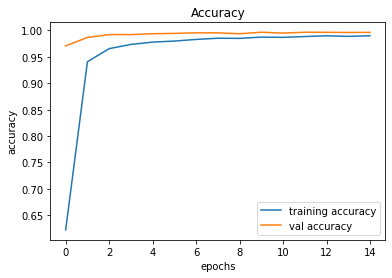

In [232]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Again using history we examine the loss of the model**

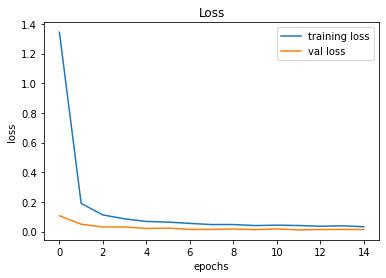

In [233]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Using a premade CSV we access shuffled photos that haven't been ran on the model to test true accuracy**

In [234]:
from sklearn.metrics import accuracy_score
# Pull the data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

sign_data = [0] * 43

# Prep this test data by applying the same preprocessing as our model to the images
for img in imgs:
    image = cv2.imread(img)
    image = cv2.resize(image,(30,30))
    image = grayscale(image)    
    data.append(np.array(image))

# While we're at it grab the counts of each image
for label in labels:
  sign_data[int(label)] += 1

# Create our dataset preprocess it and run it through the model to get our predictions
testing = np.array(data)
testing = testing.reshape(-1,30,30,1)
testing = testing.astype('float32')
testing = testing /255.0
pred = model.predict_classes(testing)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Now we need to see a breakdown of the test data to see if there is any disparity between the data sets**

<function matplotlib.pyplot.show>

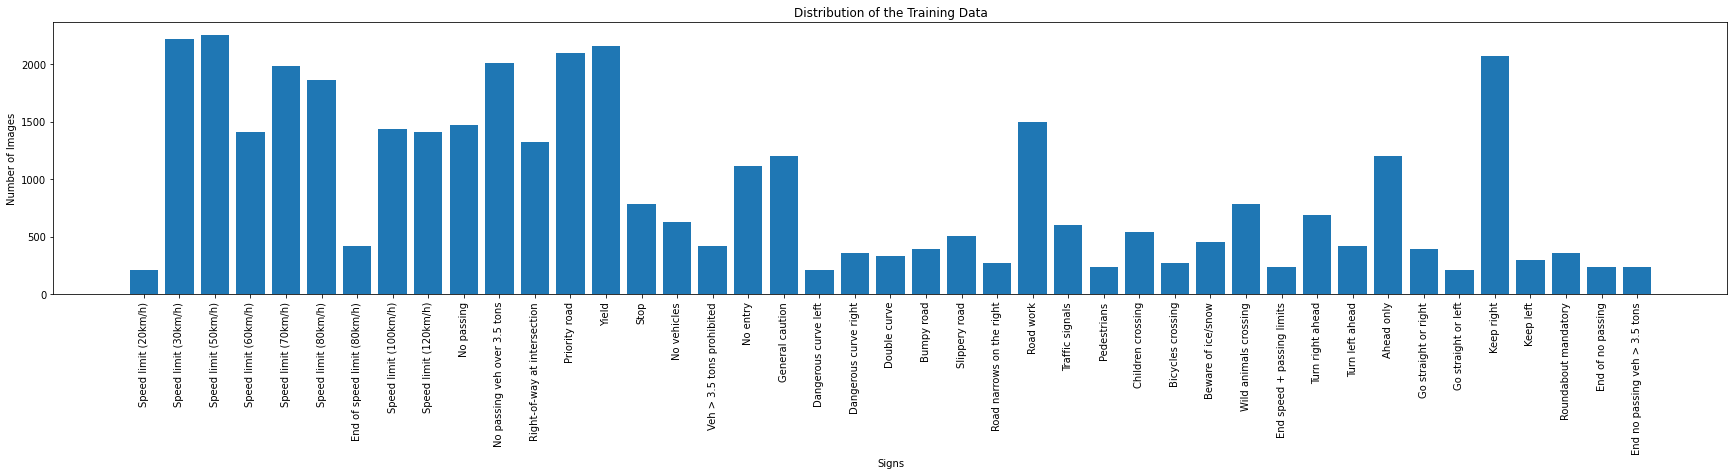

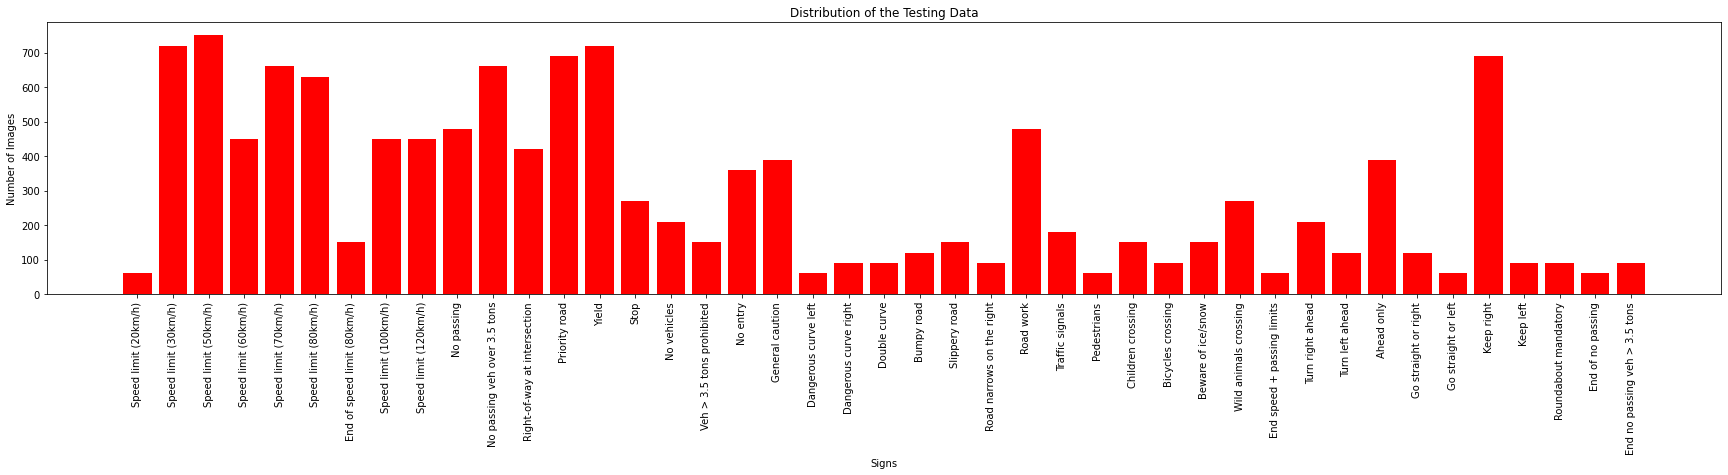

In [235]:
# Set the trackers for IDs and Counts
sign_id2 = []
sign_count2 = []

# Parse through the counts and get their length and ID
for x in range (0,43):
    sign_count2.append(sign_data[x])
    sign_id2.append(signs[x])


# Generate train bar graph
plt.figure(figsize=(30,5))
plt.bar(sign_id, sign_count)
plt.title('Distribution of the Training Data')
plt.xlabel('Signs')
plt.ylabel('Number of Images')
plt.xticks(sign_id, rotation='vertical')
plt.show

# Generate test bar graph
plt.figure(figsize=(30,5))
plt.bar(sign_id2, sign_count2, color='red')
plt.title('Distribution of the Testing Data')
plt.xlabel('Signs')
plt.ylabel('Number of Images')
plt.xticks(sign_id2, rotation='vertical')
plt.show

**We see the authors of the datasets made sure that even though each sign had a different amount of images, their breakdown into seperate sets are made equivalent**

**Now lets see the true accuracy of the model**

In [236]:
from sklearn.metrics import accuracy_score
print("Our models total accuracy on the independent data set was: ",round(100*accuracy_score(labels, pred), 2),'%')


Our models total accuracy on the independent data set was:  96.91 %


**Final accuracy is about 97% about a 3% increase in the 90s is great!**

**Base code was used as a learning tool and was sourced from**  
https://data-flair.training/blogs/python-project-traffic-signs-recognition/

**Load a saved model to to run individual tests to show that the model is modular**

In [237]:
saved = load_model('model.h5')

**Import random and get shape of the array to find out how many indexes we have**



In [238]:
import random

print(X_test.shape)
X_test_length = 12629


(7842, 30, 30, 1)


**Now we'll run the model on 5 seperate images at random**

The true image code was:      Speed limit (50km/h)
The predicted image code is:  Speed limit (50km/h)


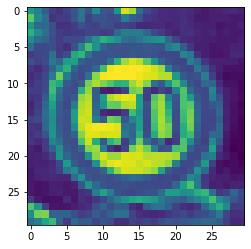

In [239]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])

The true image code was:      No passing
The predicted image code is:  No passing


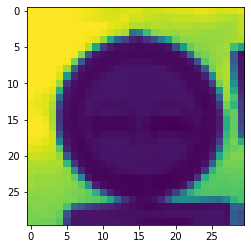

In [240]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])

The true image code was:      Stop
The predicted image code is:  Stop


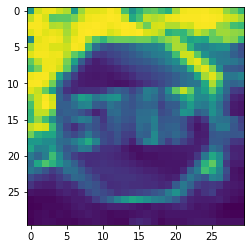

In [242]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])

The true image code was:      Priority road
The predicted image code is:  Priority road


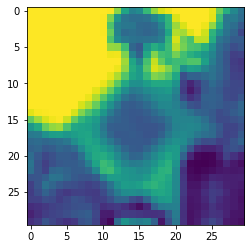

In [243]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])

The true image code was:      Keep right
The predicted image code is:  Keep right


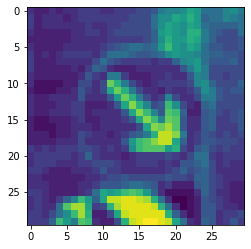

In [244]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])

The true image code was:      Speed limit (70km/h)
The predicted image code is:  Speed limit (70km/h)


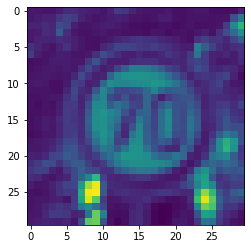

In [245]:
# Generate a random index
index = random.randint(0, X_test_length)

# Output the image ID and display image
print("The true image code was:     ",signs[labels[index]])
plt.imshow(testing[index].reshape(30,30))

# Run the model then output the predicted ID
pred = saved(testing[index].reshape(-1,30,30,1))
print("The predicted image code is: ", signs[np.argmax(pred)])